# Librairies

In [1]:
import project_functions as pf
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()
sns.set(rc={"figure.figsize":(15, 6)},style="whitegrid")

# Portfolio

Importons les données :

In [2]:
# récupérons les données des prix sauvegardés dans le fichier prices.csv
datas = pd.read_csv('datas/prices.csv', sep=',')

# On récupère les tickers stockés dans le fichier tickers.txt
tickers = pf.get_tickers('datas/tickers.txt')

In [3]:
# Uniquement les prix liées aux tickers
prices = datas[["Date"]+tickers]

# On transforme la colonne Date en index
prices.set_index("Date", inplace=True)
prices.index = pd.to_datetime(prices.index)

prices.head()

,WHA.AS,INGA.AS,URW.AS,DSM.AS,SHELL.AS,AMUND.AS,ARCAD.AS,FUR.AS,MT.AS,PHIA.AS,ROOD.AS,AGN.AS,EAS2P.AS,CTAC.AS,IEX.AS,VALUE.AS,PORF.AS,VTA.AS,SBMO.AS,TOM2.AS
Date,,,,,,,,,,,,,,,,,,,,
2010-01-04,21.835215,4.536896,68.601768,24.921452,10.527839,12.383609,10.344408,52.987740,53.427940,13.832665,0.190,2.645846,0.083711,1.933170,1.477062,3.624460,9.530450,0.684595,10.353129,6.600390
2010-01-05,22.011976,4.624887,68.513435,24.755232,10.598575,12.383609,10.731913,54.247974,52.923683,13.803706,0.180,2.639794,0.086683,1.853393,1.563948,3.983886,9.511352,0.441419,10.498744,6.921458
2010-01-06,21.822359,4.632377,69.109772,24.801203,10.522962,12.383609,10.791023,55.482346,52.523476,13.591340,0.188,2.630441,0.086683,1.853393,1.448100,4.757104,10.409009,0.417630,10.655277,6.905454
2010-01-07,21.565245,4.742836,68.380905,24.567801,10.491251,12.383609,10.804158,56.723167,53.491985,13.514114,0.184,2.683808,0.086683,1.837277,1.448100,5.134652,10.409009,0.420273,10.604313,7.026479
2010-01-08,21.533104,4.848926,68.402977,24.705727,10.430267,12.383609,10.731913,56.929981,53.868168,13.533423,0.186,2.766887,0.086089,1.829219,1.439411,5.436690,10.409009,0.422916,10.728085,7.065488


Calculons les returns journaliers :

In [4]:
returns = pf.daily_asset_return(prices)

returns.head()

,WHA.AS,INGA.AS,URW.AS,DSM.AS,SHELL.AS,AMUND.AS,ARCAD.AS,FUR.AS,MT.AS,PHIA.AS,ROOD.AS,AGN.AS,EAS2P.AS,CTAC.AS,IEX.AS,VALUE.AS,PORF.AS,VTA.AS,SBMO.AS,TOM2.AS
Date,,,,,,,,,,,,,,,,,,,,
2010-01-05,0.008095,0.019395,-0.001288,-0.006670,0.006719,0.0,0.037460,0.023784,-0.009438,-0.002094,-0.052632,-0.002287,0.035503,-0.041267,0.058824,0.099167,-0.002004,-0.355212,0.014065,0.048644
2010-01-06,-0.008614,0.001619,0.008704,0.001857,-0.007134,0.0,0.005508,0.022754,-0.007562,-0.015385,0.044444,-0.003543,0.000000,0.000000,-0.074074,0.194086,0.094377,-0.053892,0.014910,-0.002312
2010-01-07,-0.011782,0.023845,-0.010547,-0.009411,-0.003013,0.0,0.001217,0.022364,0.018440,-0.005682,-0.021277,0.020288,0.000000,-0.008695,0.000000,0.079365,0.000000,0.006329,-0.004783,0.017526
2010-01-08,-0.001490,0.022368,0.000323,0.005614,-0.005813,0.0,-0.006687,0.003646,0.007033,0.001429,0.010870,0.030955,-0.006857,-0.004386,-0.006000,0.058823,0.000000,0.006289,0.011672,0.005552
2010-01-11,-0.011194,-0.024839,0.002583,-0.008302,0.003275,0.0,-0.022338,0.017823,-0.015156,0.009510,-0.021505,-0.015510,0.000000,-0.030837,0.016097,-0.125000,-0.084404,0.000000,0.018324,-0.009060


Nous devons définir une période d'entrainement et de test :
* la période d'entrainement est entre la première date disponible et le 1er Janvier 2015
* la période de test est entre la fin de l'entrainement et la dernière date disponible 

In [5]:
begin_train = returns.index[0]
end_train = "2017-01-01"
begin_test = end_train
end_test = returns.index[-1]

Il est nécessaire de séparer les données entre la phase d'entrainement et la phase de test.

In [6]:
returns_train, returns_test = pf.seperate_df(returns, begin_train, end_train, begin_test, end_test)

Nous pouvons déterminer les returns annualisés année grâce à la ligne de code suivante :

In [7]:
annu_returns_train = pf.annualy_asset_return(returns_train)

## Mean-Variance Portfolio

Let's compute the covariance matrix of the returns.

In [8]:
cov_matrix_train = returns_train.cov()

In [9]:
w,r,v = pf.gmv_portfolio(returns_train,cov_matrix_train,show=True)

The portfolio return is: 11.39 %
The portfolio volatility is: 13.38 %


In [10]:
w,r,vol = pf.opt_mean_variance(returns_train,cov_matrix_train,obj_rend=0.1,show=True)

/Users/simonevanno/Desktop/centrale marseille/cours/3A/TEMPS2/Gestion Portefeuille/Portfolio-Project/project_functions.py:48: RuntimeWarning: invalid value encountered in double_scalars
  return (df+1).prod()**(business_days/df.shape[0])-1


The portfolio return is: 10.0 %
The portfolio volatility is: 13.4 %


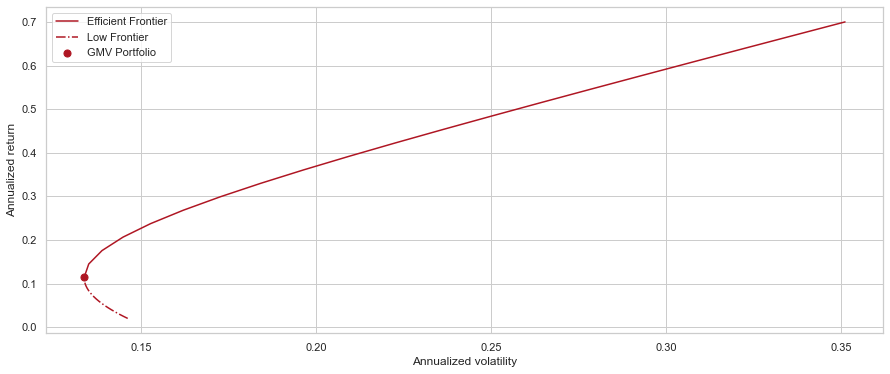

In [11]:
# plot the efficient frontier
eff = pf.efficient_frontier(returns_train,cov_matrix_train,min=0.02,max=0.7,number=20,plot=True)

Calculons le return du portfolio avec les poids souhaités sur la période de test :

In [12]:
portfolio_return_test = pf.portfolio_return(w,returns_test,show=True)

The portfolio return is: 8.39 %
